/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


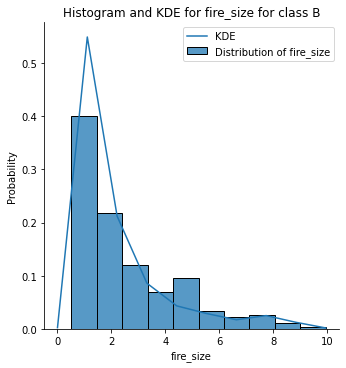

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

fire_size_classes = pd.unique(df['fire_size_class'])
property = 'fire_size'
s_c = 'B'

dfo = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    #new invalid field - Humidity 0 is impossible on Earth
    df_clean = df_clean.drop(df_clean.loc[df_clean.Hum_pre_7 == 0].index).reset_index()
    return df_clean

df = preprocess_missing_weather_data(dfo)

df_sampled = df.loc[df['fire_size_class'] == s_c].reset_index()

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(0, max_amount, num=10)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 10)

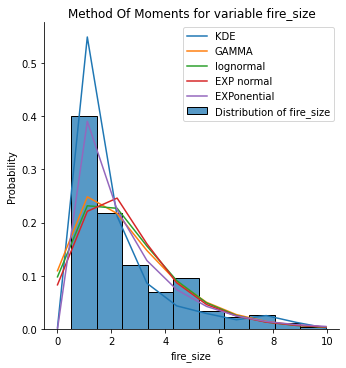

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.886321070085496, pvalue=7.20825169900277e-10), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=2.8773705929313445, pvalue=0)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.8838426919815127, pvalue=8.943263473417836e-10), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=2.7547515122228856, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.8893968014440545, pvalue=5.479070461371373e-10), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=2.725399116010007, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333333333335, pvalue=0)


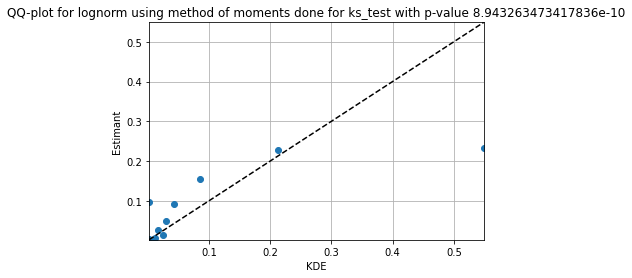

In [2]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 10)

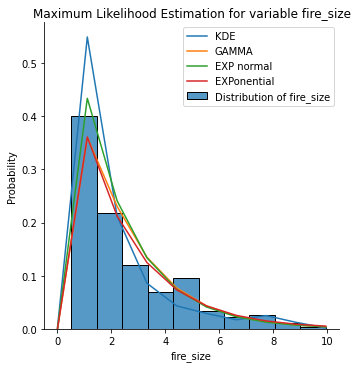

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9891841979557703, pvalue=4.381444307982105e-20), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.312900291023157, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9973530792907137, pvalue=3.3762866698842224e-26), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3283105791993735, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9815334284381038, pvalue=9.223435799981192e-18), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.298587861630981, pvalue=0)


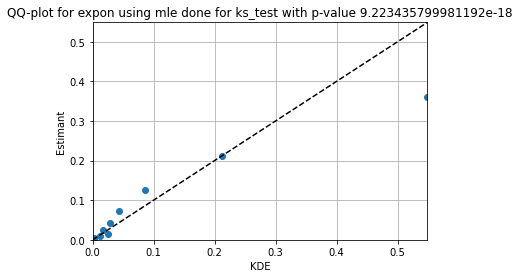

In [3]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 10)

[2.35233076e-06 1.57296694e+00 1.82108121e+00]
[0.60872284 1.21772397 1.99010725]


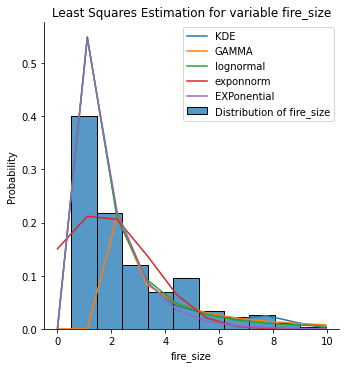

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333333333335, pvalue=0)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9999999989216877, pvalue=4.25084922243626e-90), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333312845403, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7130738436850605, pvalue=1.1728374057236879e-05), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.5691090231501432, pvalue=1.5932413875319185e-05)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333333333335, pvalue=0)


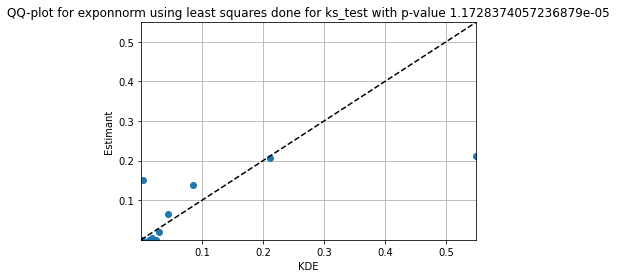

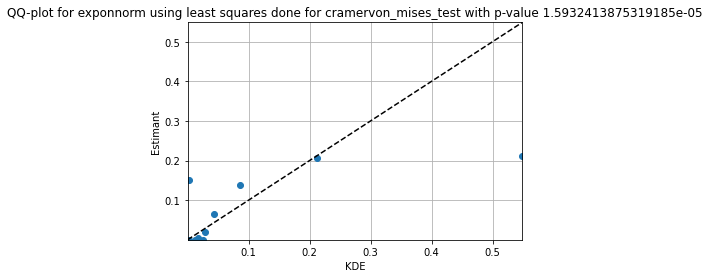

In [4]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 10)

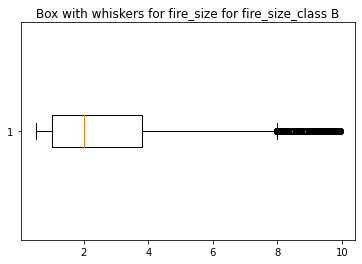

In [5]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png', bbox_inches='tight')
plt.show()